Implement ADAM,SGD optimization algorithms

Explanation
Data Preparation:

The Iris dataset is loaded and standardized using StandardScaler.
Data is converted into PyTorch tensors and split into training and test sets.
DataLoader Creation:

DataLoaders are created for mini-batch processing, which will be used in training the models.
Model Definition:

A simple neural network with one hidden layer is defined using torch.nn.Module.
Training and Evaluation:

The function train_and_evaluate takes an optimizer name and optimizer function as input, trains the model, and returns accuracy scores.
The model is trained using both the Adam and SGD optimizers for 30 epochs, and accuracy is recorded.
Visualization:

The test accuracies of the models using Adam and SGD optimizers are plotted over 30 epochs.


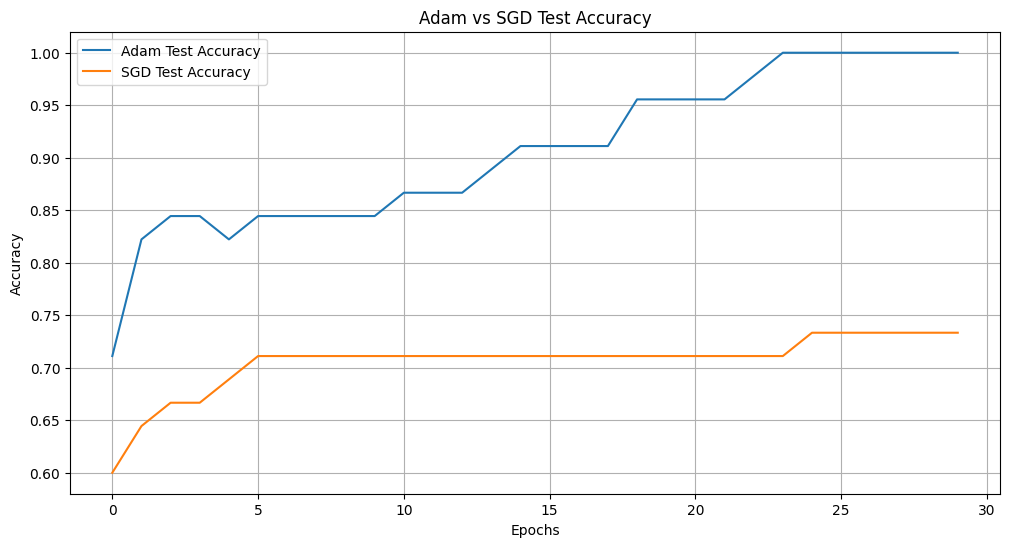

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.3, random_state=42)

# Create DataLoader for mini-batch processing
batch_size = 32
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define a simple neural network model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(4, 10)
        self.layer2 = nn.Linear(10, 3)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.layer2(x)
        return x

# Function to train and evaluate the model
def train_and_evaluate(optimizer_name, optimizer):
    model = SimpleNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optimizer(model.parameters(), lr=0.01)

    train_accuracies = []
    test_accuracies = []

    n_epochs = 30
    for epoch in range(n_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

        # Evaluate on the training set
        model.eval()
        train_correct = 0
        with torch.no_grad():
            for X_batch, y_batch in train_loader:
                outputs = model(X_batch)
                _, predicted = torch.max(outputs, 1)
                train_correct += (predicted == y_batch).sum().item()
        train_acc = train_correct / len(train_loader.dataset)
        train_accuracies.append(train_acc)

        # Evaluate on the test set
        test_correct = 0
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                outputs = model(X_batch)
                _, predicted = torch.max(outputs, 1)
                test_correct += (predicted == y_batch).sum().item()
        test_acc = test_correct / len(test_loader.dataset)
        test_accuracies.append(test_acc)

    return train_accuracies, test_accuracies

# Train and evaluate with Adam and SGD
adam_train_accuracies, adam_test_accuracies = train_and_evaluate('Adam', optim.Adam)
sgd_train_accuracies, sgd_test_accuracies = train_and_evaluate('SGD', optim.SGD)

# Plotting the results
plt.figure(figsize=(12, 6))

plt.plot(range(30), adam_test_accuracies, label='Adam Test Accuracy')
plt.plot(range(30), sgd_test_accuracies, label='SGD Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Adam vs SGD Test Accuracy')
plt.legend()
plt.grid(True)

plt.show()
